<h1 style="font-size: 50px;text-align: center;">⭐Principal Component Analysis⭐</h1>

### Imports 👇

In [486]:
import pandas
import numpy
from sklearn import svm
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.decomposition import PCA
import seaborn
import matplotlib.pyplot as pyplot
import warnings
warnings.filterwarnings("ignore")

### Creating the SVM model instance(object) 👇
This model will be used for checkin working of the data before and after tranformation of data using PCA

In [565]:
model_for_normal_data=svm.SVC()
model_for_Transformed_data=svm.SVC()
temp_model=svm.SVC()

##### 👇 setting the matplotlib configurations

In [572]:
%matplotlib inline
pyplot.rcParams["figure.figsize"] = (15, 12)

### Creating the some preprocessing functions

In [489]:
classes_list=["rice", "maize", "cotton", "coconut",  "orange", "apple", "watermelon","jute", "mango","coffee"]
def get_class_number(class_name):
    if class_name=='rice':
        return 0
    if class_name=='maize':
        return 1
    if class_name=='cotton':
        return 2
    if class_name=='coconut':
        return 3
    if class_name=='orange':
        return 4
    if class_name=='apple':
        return 5
    if class_name=='jute':
        return 6
    if class_name=='mango':
        return 7
    if class_name=='watermelon':
        return 8
    if class_name=='coffee':
        return 9

# Data Reading 👇

In [490]:
data=pandas.read_csv('./Crop_Suggestion.csv')

### 👇 cheking the columns, data, data type information, correlation between attributes

In [491]:
data.columns

Index(['temperature', 'humidity', 'rainfall', 'label'], dtype='object')

In [492]:
data

,temperature,humidity,rainfall,label
0,20.879744,82.002744,202.935536,rice
1,21.770462,80.319644,226.655537,rice
2,23.004459,82.320763,263.964248,rice
3,26.491096,80.158363,242.864034,rice
4,20.130175,81.604873,262.717340,rice
...,...,...,...,...
995,26.774637,66.413269,177.774507,coffee
996,27.417112,56.636362,127.924610,coffee
997,24.131797,67.225123,173.322839,coffee
998,26.272418,52.127394,127.175293,coffee


#### 👇 checking the available number of classes

In [493]:
data['label'].value_counts()

rice          100
maize         100
cotton        100
coconut       100
orange        100
apple         100
watermelon    100
jute          100
mango         100
coffee        100
Name: label, dtype: int64

In [494]:
data.describe()

,temperature,humidity,rainfall
count,1000.000000,1000.000000,1000.000000
mean,25.017344,78.038307,127.851236
std,3.808391,14.857447,56.785011
min,10.010813,45.022364,40.126504
25%,23.113147,67.087637,90.413542
50%,24.971106,81.979157,111.777864
75%,26.681848,90.918003,169.861544
max,35.990097,99.981876,298.560117


### 👇 Scatter plot of the data

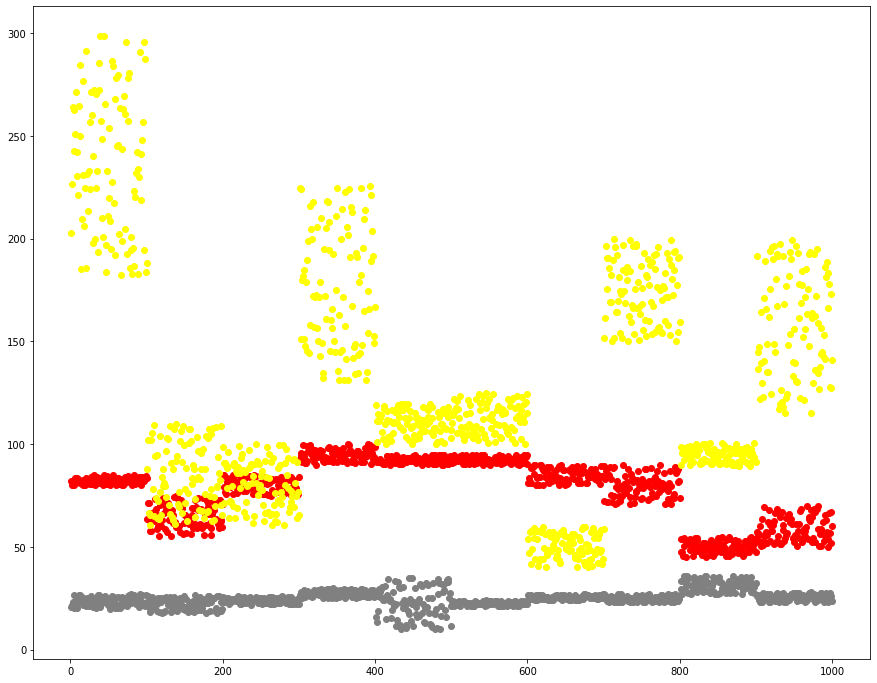

In [570]:
pyplot.scatter(x=[i for i in range(1,len(data)+1)],y=data['temperature'],color = 'gray')
pyplot.scatter(x=[i for i in range(1,len(data)+1)],y=data['humidity'],color = 'red')
pyplot.scatter(x=[i for i in range(1,len(data)+1)],y=data['rainfall'],color = 'yellow')

### 👇Attribute comparison paring graph of normal Data
here each graph is drawn by one to one manner

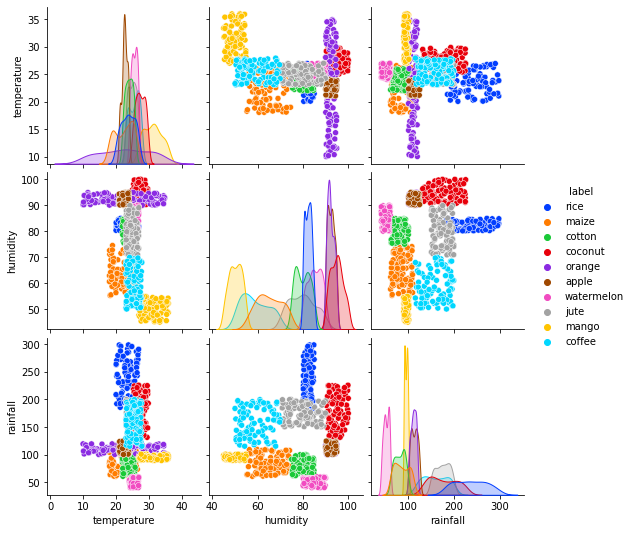

In [496]:
seaborn.pairplot(data.iloc[:,:4], hue="label",palette="bright")

<h1 style="font-size: 60px;text-align: center;">Dimensionality Reduction</h1>
<h1 style="font-size: 40px;text-align: center;">Principal Component Analysis Transformation</h1>

### creating instance of PCA 👇

In [497]:
Principal_Component_Analyser=PCA(n_components=2)

### Number of Principle components is 2 👆
#### means any number of features will be converted in to 2 features    ( M features ----> 2 features)



In [498]:
Component_Data=Principal_Component_Analyser.fit_transform(data.iloc[:,:3])

### 👇 Mean of each features

In [499]:
Principal_Component_Analyser.mean_

array([ 25.01734441,  78.03830672, 127.85123646])

### 👇 Covariance matrix of the Given Data

In [500]:
Principal_Component_Analyser.get_covariance()

array([[ 1.45038415e+01, -1.76864133e+01, -1.46912754e+00],
       [-1.76864133e+01,  2.20743746e+02,  1.18638463e+02],
       [-1.46912754e+00,  1.18638463e+02,  3.22453752e+03]])

In [501]:
Transformed_Data=pandas.DataFrame({"label":data['label']})

In [502]:
Transformed_Data['column1']=[i[0] for i in Component_Data]
Transformed_Data['column2']=[i[1] for i in Component_Data]

## 👇 Tranformed Data

In [505]:
Transformed_Data

,label,column1,column2
0,rice,75.184975,-1.351831
1,rice,98.819617,1.333277
2,rice,136.177367,0.914760
3,rice,115.005984,2.539035
4,rice,134.905152,1.330025
...,...,...,...
995,coffee,49.425175,13.687306
996,coffee,-0.771709,21.515530
997,coffee,45.010739,12.475718
998,coffee,-1.697363,25.875760


In [506]:
Transformed_Data.describe()

,column1,column2
count,1.000000e+03,1.000000e+03
mean,-6.366463e-15,-1.409717e-14
std,5.682620e+01,1.475104e+01
min,-8.732669e+01,-2.004431e+01
25%,-3.814501e+01,-1.341110e+01
50%,-1.555714e+01,-2.553518e+00
75%,4.201219e+01,1.044617e+01
max,1.708440e+02,3.244620e+01


### 👇Attribute comparison paring graph of Transformed Data
here each graph is drawn by one to one manner

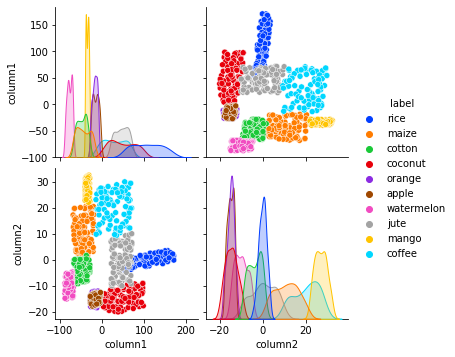

In [507]:
seaborn.pairplot(Transformed_Data,hue="label",palette="bright")

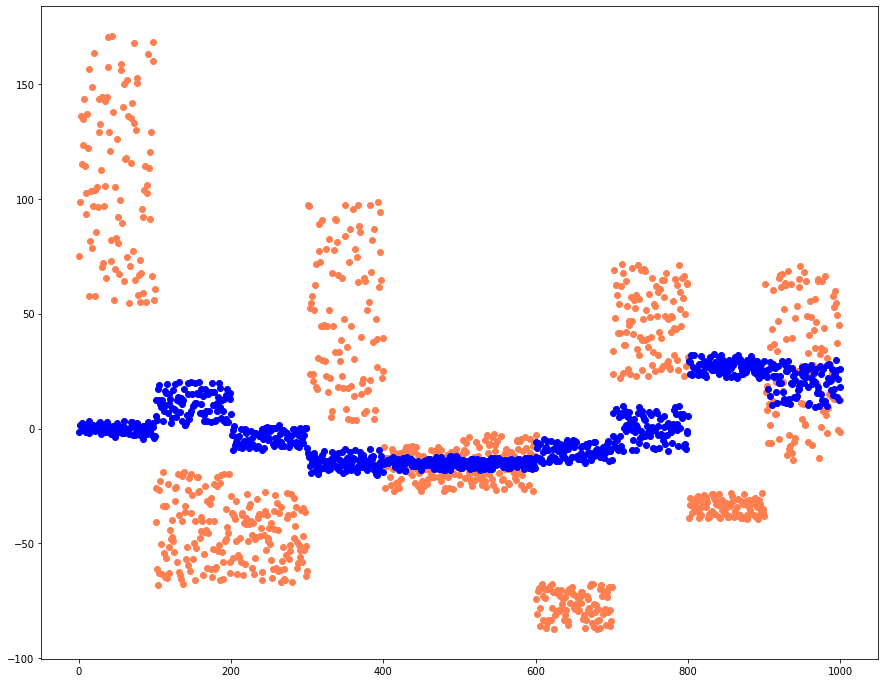

In [571]:
pyplot.scatter(x=[i for i in range(1,len(Transformed_Data)+1)],y=Transformed_Data['column1'],color = 'coral')
pyplot.scatter(x=[i for i in range(1,len(Transformed_Data)+1)],y=Transformed_Data['column2'],color='blue')
# pyplot.scatter(x=[i for i in range(1,len(data)+1)],y=data['rainfall'],color = 'yellow')

<h1 style="font-size: 60px;text-align: center;">Training and Testing on Data before Tranformation by PCA</h1>

# Data Preparation for Training and testing on Normal Data

### Suffling the data set 👇
this is to get splitted data, that have all type of the classes in training and testing

In [546]:
shuffled_Data=data.sample(frac=1)
Training_Data = shuffled_Data[:850]
Testing_Data = shuffled_Data[850:]

## Splitting the dataset into training and testing 👆

For Training 85% data is being used and for testing 15% data is used from the given data

means 850 rows will be used for training and 150 rows will be used for testing

## Dividing the training data features and labels 👇 
this will be used for training of SVM model

In [547]:
training_Labels=Training_Data['label']
training_Features=Training_Data.drop(['label'],axis=1)
testing_Labels=Testing_Data['label']
testing_Features=Testing_Data.drop(['label'],axis=1)

## dividing the testing data features and labels 👆
this will be used for testing the SVM model

## fitting the model 👇

In [548]:
model_for_normal_data.fit(training_Features,training_Labels)

SVC()

### Now model is Trained 👆

## ________________________________________________________________________

## Optional Part 👇
### checking model on training data to check training accuracy (not needed)
### plotting the confusion matrix for model on training data
### calculating the accuracy of the model and precision of the respective classes

              precision    recall  f1-score   support

        rice       0.52      0.54      0.53        84
       maize       0.92      0.94      0.93        88
      cotton       1.00      0.90      0.95        88
     coconut       0.88      0.97      0.92        86
      orange       0.74      0.90      0.81        81
       apple       0.99      0.84      0.91        89
  watermelon       0.97      1.00      0.98        83
        jute       0.55      0.56      0.55        84
       mango       0.97      0.79      0.87        86
      coffee       0.96      1.00      0.98        81

    accuracy                           0.84       850
   macro avg       0.85      0.84      0.84       850
weighted avg       0.85      0.84      0.84       850



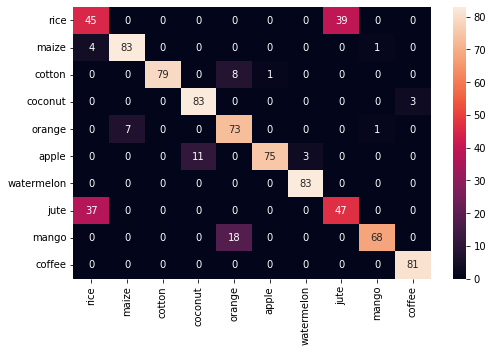

In [549]:
training_predicted_values=model_for_normal_data.predict(training_Features)
training_classification_data=confusion_matrix(training_Labels,training_predicted_values)
seaborn.heatmap(training_classification_data,annot=True,xticklabels=classes_list,yticklabels=classes_list)
print(classification_report(training_Labels,training_predicted_values,target_names=classes_list))

# Now Testing the model 👇

## plotting the confusion matrix for model of tested data
### calculating the accuracy of the model and precision of the respective classes

              precision    recall  f1-score   support

        rice       0.69      0.56      0.62        16
       maize       0.86      1.00      0.92        12
      cotton       1.00      0.83      0.91        12
     coconut       0.81      0.93      0.87        14
      orange       0.81      0.89      0.85        19
       apple       1.00      0.73      0.84        11
  watermelon       1.00      1.00      1.00        17
        jute       0.63      0.75      0.69        16
       mango       1.00      0.86      0.92        14
      coffee       0.95      1.00      0.97        19

    accuracy                           0.86       150
   macro avg       0.88      0.86      0.86       150
weighted avg       0.87      0.86      0.86       150



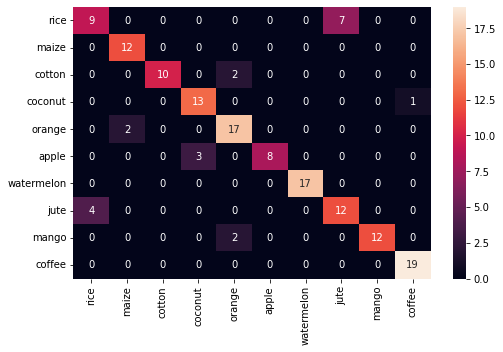

In [550]:
predicted_values=model_for_normal_data.predict(testing_Features)
classification_data=confusion_matrix(testing_Labels,predicted_values)
seaborn.heatmap(classification_data,annot=True,xticklabels=classes_list,yticklabels=classes_list)
print(classification_report(testing_Labels,predicted_values,target_names=classes_list))

<h1 style="font-size: 50px;text-align: center;">Training and Testing on Transformed Data after Tranformation by PCA</h1>

# Data Preparation for Training and testing on Transformed Data

### Suffling the Transformed data set because PCA is unsupervised, hence label are same as previous👇
this is to get splitted data, that have all type of the classes in training and testing

In [551]:
Tranformed_shuffled_Data=Transformed_Data.sample(frac=1)
Tranformed_Training_Data = Tranformed_shuffled_Data[:850]
Tranformed_Testing_Data = Tranformed_shuffled_Data[850:]

## Splitting the dataset into training and testing 👆

For Training 85% data is being used and for testing 15% data is used from the given data

means 850 rows will be used for training and 150 rows will be used for testing

## Dividing the training data features and labels 👇 
this will be used for training of SVM model

In [552]:
Tranformed_training_Labels=Tranformed_Training_Data['label']
Tranformed_training_Features=Tranformed_Training_Data.drop(['label'],axis=1)
Tranformed_testing_Labels=Tranformed_Testing_Data['label']
Tranformed_testing_Features=Tranformed_Testing_Data.drop(['label'],axis=1)

## dividing the testing data features and labels 👆
this will be used for testing the SVM model

## fitting the model on Transformed Data 👇

In [554]:
model_for_Transformed_data.fit(Tranformed_training_Features,Tranformed_training_Labels)

SVC()

### checking model on training data to check training accuracy (not needed)
### plotting the confusion matrix for model on training data
### calculating the accuracy of the model and precision of the respective classes

              precision    recall  f1-score   support

        rice       0.55      0.54      0.55        89
       maize       0.95      0.95      0.95        82
      cotton       1.00      0.97      0.98        86
     coconut       0.90      0.98      0.94        82
      orange       0.80      0.93      0.86        80
       apple       0.98      0.80      0.88        81
  watermelon       0.93      1.00      0.96        87
        jute       0.55      0.59      0.57        86
       mango       0.97      0.81      0.88        89
      coffee       0.98      1.00      0.99        88

    accuracy                           0.85       850
   macro avg       0.86      0.86      0.86       850
weighted avg       0.86      0.85      0.85       850



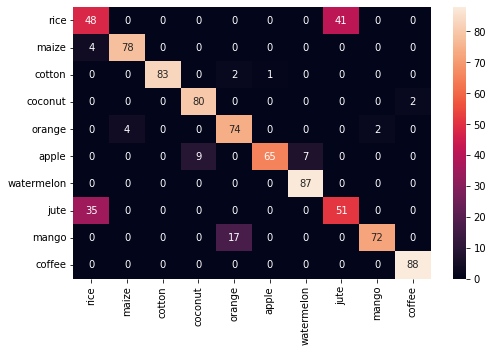

In [555]:
Transformed_training_predicted_values=model_for_Transformed_data.predict(Tranformed_training_Features)
Transformed_training_classification_data=confusion_matrix(Tranformed_training_Labels,Transformed_training_predicted_values)
seaborn.heatmap(Transformed_training_classification_data,annot=True,xticklabels=classes_list,yticklabels=classes_list)
print(classification_report(Tranformed_training_Labels,Transformed_training_predicted_values,target_names=classes_list))

# Now Testing the model 👇
## plotting the confusion matrix for model of tested data
### calculating the accuracy of the model and precision of the respective classes

              precision    recall  f1-score   support

        rice       0.38      0.45      0.42        11
       maize       0.89      0.89      0.89        18
      cotton       1.00      0.86      0.92        14
     coconut       0.85      0.94      0.89        18
      orange       0.86      0.90      0.88        20
       apple       1.00      0.84      0.91        19
  watermelon       1.00      1.00      1.00        13
        jute       0.54      0.50      0.52        14
       mango       1.00      1.00      1.00        11
      coffee       0.92      1.00      0.96        12

    accuracy                           0.85       150
   macro avg       0.84      0.84      0.84       150
weighted avg       0.86      0.85      0.85       150



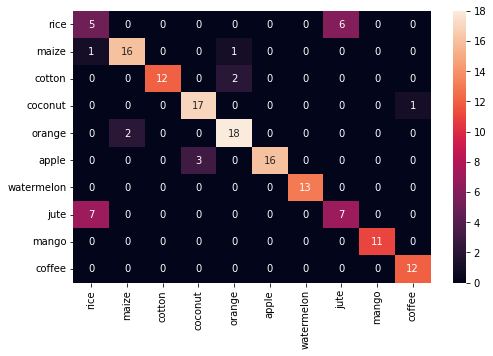

In [556]:
Transformed_predicted_values=model_for_Transformed_data.predict(Tranformed_testing_Features)
Transformed_classification_data=confusion_matrix(Tranformed_testing_Labels,Transformed_predicted_values)
seaborn.heatmap(Transformed_classification_data,annot=True,xticklabels=classes_list,yticklabels=classes_list)
print(classification_report(Tranformed_testing_Labels,Transformed_predicted_values,target_names=classes_list))

<h1 style="font-size: 50px;text-align: center;">If we just remove one column rather than using PCA, then Accuracy changed as following</h1>

              precision    recall  f1-score   support

        rice       1.00      0.17      0.29        18
       maize       0.65      0.92      0.76        12
      cotton       0.55      0.75      0.63         8
     coconut       0.36      0.31      0.33        16
      orange       0.00      0.00      0.00        18
       apple       0.67      0.67      0.67        18
  watermelon       0.95      1.00      0.97        18
        jute       0.22      0.45      0.29        11
       mango       0.41      0.67      0.51        18
      coffee       0.50      0.62      0.55        13

    accuracy                           0.53       150
   macro avg       0.53      0.55      0.50       150
weighted avg       0.54      0.53      0.49       150



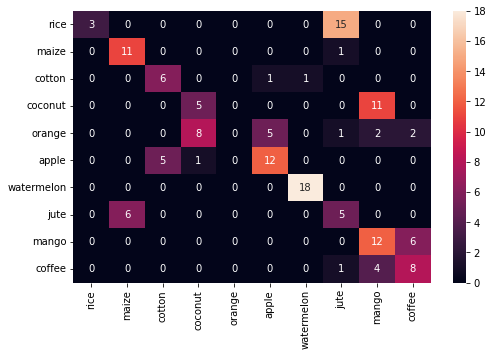

In [567]:
temp_shuffled_Data=data.sample(frac=1)
temp_Training_Data = temp_shuffled_Data[:850]
temp_Testing_Data = temp_shuffled_Data[850:]
temp_training_Labels=temp_Training_Data['label']
temp_training_Features=temp_Training_Data.drop(['label','rainfall'],axis=1)
temp_testing_Labels=temp_Testing_Data['label']
temp_testing_Features=temp_Testing_Data.drop(['label','rainfall'],axis=1)
temp_model.fit(temp_training_Features,temp_training_Labels)
temp_predicted_values=temp_model.predict(temp_testing_Features)
temp_classification_data=confusion_matrix(temp_testing_Labels,temp_predicted_values)
seaborn.heatmap(temp_classification_data,annot=True,xticklabels=classes_list,yticklabels=classes_list)
print(classification_report(temp_testing_Labels,temp_predicted_values,target_names=classes_list))

<h1 style="font-size: 85px;text-align: center;">⚡Summery⚡</h1>

## Features before PCA 👇
<img src="data points before transformation.png" alt="">

## Features before PCA 👇
<img src="data points after transformation.png" alt="">

# Accuracy  Before Transformnation    

In [562]:
print(classification_report(testing_Labels,predicted_values,target_names=classes_list))

              precision    recall  f1-score   support

        rice       0.69      0.56      0.62        16
       maize       0.86      1.00      0.92        12
      cotton       1.00      0.83      0.91        12
     coconut       0.81      0.93      0.87        14
      orange       0.81      0.89      0.85        19
       apple       1.00      0.73      0.84        11
  watermelon       1.00      1.00      1.00        17
        jute       0.63      0.75      0.69        16
       mango       1.00      0.86      0.92        14
      coffee       0.95      1.00      0.97        19

    accuracy                           0.86       150
   macro avg       0.88      0.86      0.86       150
weighted avg       0.87      0.86      0.86       150



# Testing accuracy is 85% before applying PCA 👆

# Accuracy  After Transformnation

In [563]:
print(classification_report(Tranformed_testing_Labels,Transformed_predicted_values,target_names=classes_list))

              precision    recall  f1-score   support

        rice       0.38      0.45      0.42        11
       maize       0.89      0.89      0.89        18
      cotton       1.00      0.86      0.92        14
     coconut       0.85      0.94      0.89        18
      orange       0.86      0.90      0.88        20
       apple       1.00      0.84      0.91        19
  watermelon       1.00      1.00      1.00        13
        jute       0.54      0.50      0.52        14
       mango       1.00      1.00      1.00        11
      coffee       0.92      1.00      0.96        12

    accuracy                           0.85       150
   macro avg       0.84      0.84      0.84       150
weighted avg       0.86      0.85      0.85       150



# Testing accuracy is 85% After applying PCA 👆

In [568]:
print(classification_report(temp_testing_Labels,temp_predicted_values,target_names=classes_list))

              precision    recall  f1-score   support

        rice       1.00      0.17      0.29        18
       maize       0.65      0.92      0.76        12
      cotton       0.55      0.75      0.63         8
     coconut       0.36      0.31      0.33        16
      orange       0.00      0.00      0.00        18
       apple       0.67      0.67      0.67        18
  watermelon       0.95      1.00      0.97        18
        jute       0.22      0.45      0.29        11
       mango       0.41      0.67      0.51        18
      coffee       0.50      0.62      0.55        13

    accuracy                           0.53       150
   macro avg       0.53      0.55      0.50       150
weighted avg       0.54      0.53      0.49       150



## 👆 If we just remove one column rather than using PCA, then Accuracy become 55%

## if we use PCA then M features get transformed/Reduced in N features with having similar data properties with original data, hence it is able to show similar accuracy as like as original data even having less features
## but if we reduce the number of columns manualy by just removing it then we can loose some important features of the original data, hence accuracy for model can get reduced